# Singular Value Decomposition Applications

Based on the book "Data-driven science and engineering machine learning, dynamical systems, and control" by Steven L. Brunton and J. Nathan Kutz and the codes developed by Daniel Dylewsky available at: https://databookuw.com/

### Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.image import imread

## Image Compression

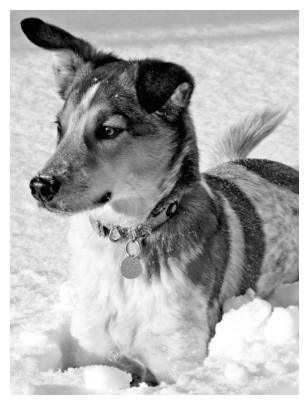

In [2]:
# Set the image size
plt.rcParams['figure.figsize'] = [8, 5]

# Load the image
A = imread(os.path.join('Data','dog.jpg'))

#Convert to garyscale
X = np.mean(A, -1)

# Plot the image
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [3]:
# Compute teh SVD of matrix X
U, S, VT = np.linalg.svd(X,full_matrices=False)

# Convert S into a diagonal datrix
S = np.diag(S)

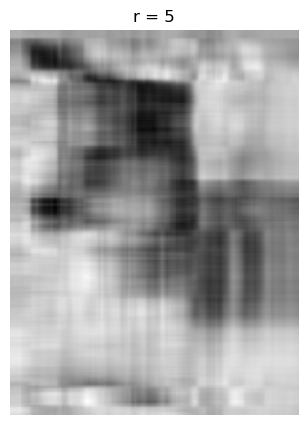

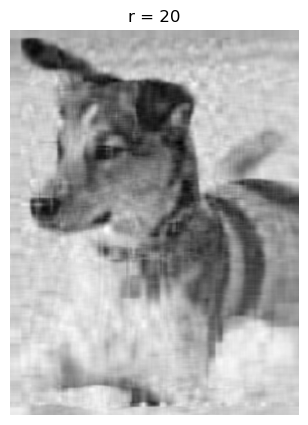

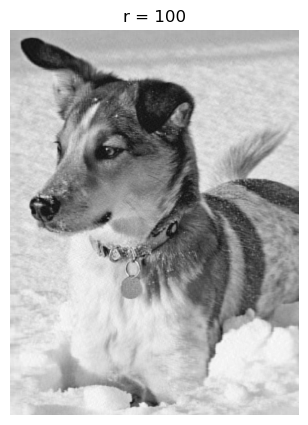

In [4]:

# Evaluate the effect of the rank r approximation of the image
j = 0

for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

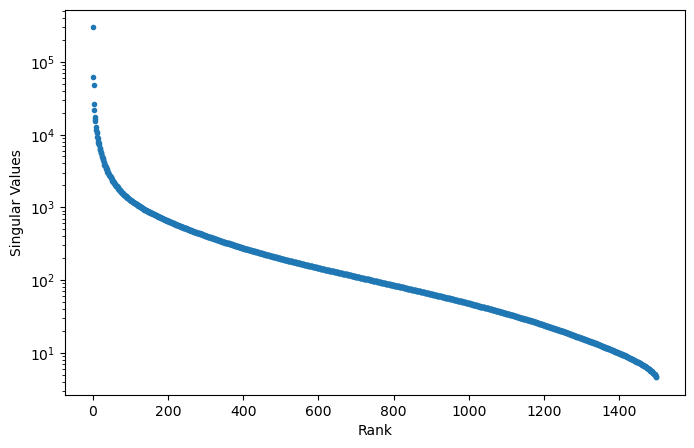

In [5]:
plt.semilogy(np.diag(S),'.')
plt.xlabel('Rank')
plt.ylabel('Singular Values')
plt.show()

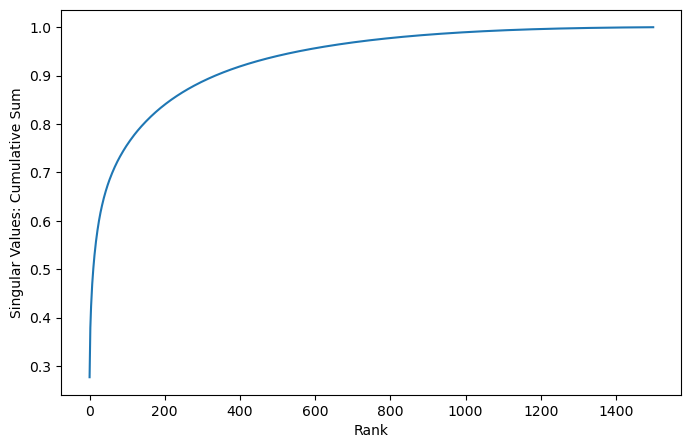

In [6]:
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.ylabel('Singular Values: Cumulative Sum')
plt.xlabel('Rank')
plt.show()

## Geometric interpretation of SVD

In [7]:
# Ratation on the x, y, and z axes
theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])

#Stretching along the x, y, and z axes
Sigma = np.diag([3, 1, 0.5])

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma


In [8]:
U, S,Vt = np.linalg.svd(X, full_matrices=False)
X = U @ np.diag(S)

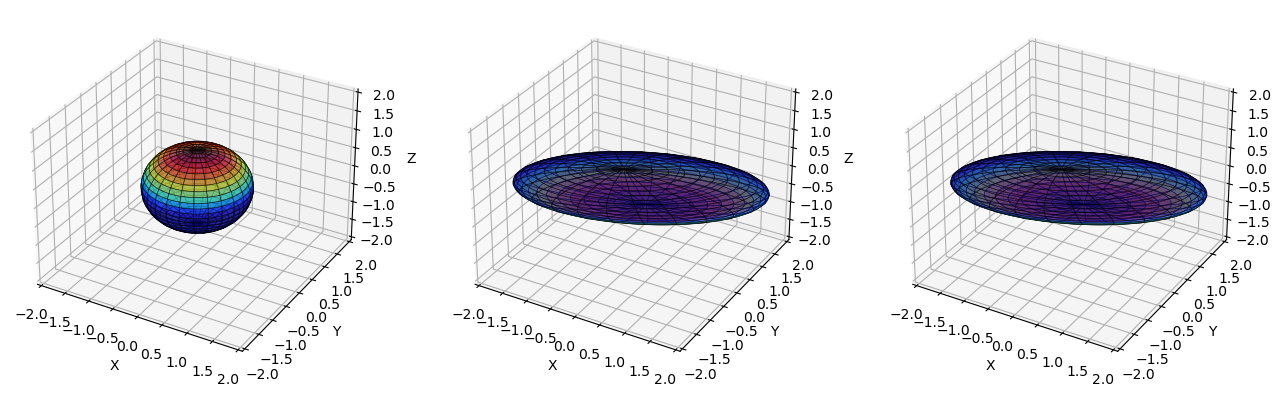

In [9]:
# Set the image size
plt.rcParams['figure.figsize'] = [16, 10]

# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(131, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

#  Plot the rotated surface
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot the rotated surface by SVD
xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

U, S,Vt = np.linalg.svd(X, full_matrices=False)
X1 = U @ np.diag(S)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf3.set_edgecolor('k')
ax3.set_xlim3d(-2, 2)
ax3.set_ylim3d(-2, 2)
ax3.set_zlim3d(-2, 2)

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

plt.show()

## Linear Regression

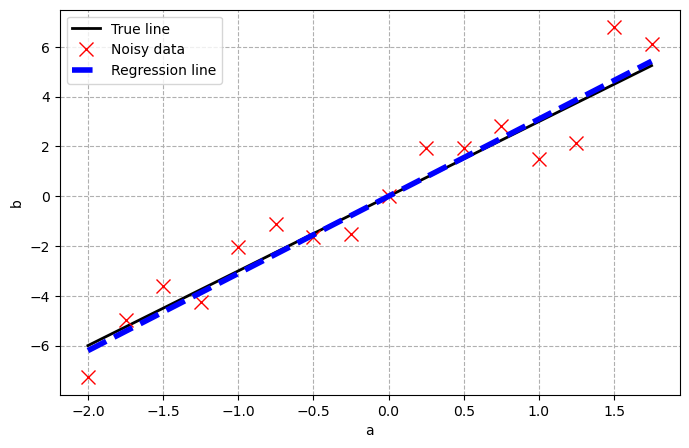

In [10]:
plt.rcParams['figure.figsize'] = [8, 5]
x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, color='k', linewidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(a,xtilde * a,'--',color='b',linewidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

## Multilinear Solution

### Cement Heat Generation Data

In [11]:
# Load dataset
A = np.loadtxt(os.path.join('Data','hald_ingredients.csv'),delimiter=',')
b = np.loadtxt(os.path.join('Data','hald_heat.csv'),delimiter=',')

In [12]:
# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x_SVD = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

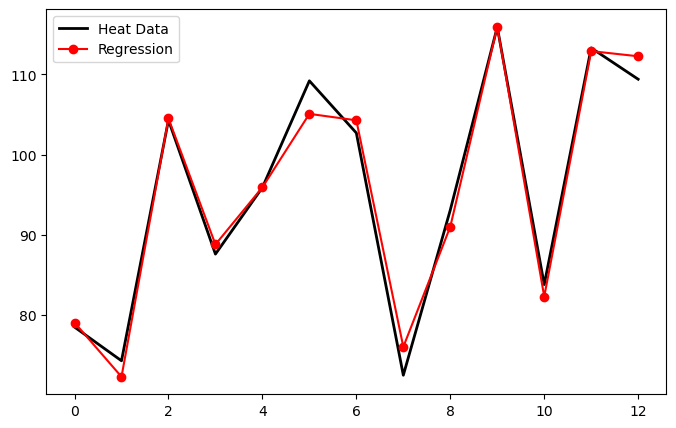

In [13]:
plt.plot(b, color='k', linewidth=2, label='Heat Data') # True relationship
plt.plot(A@x_SVD, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')

plt.legend()
plt.show()

### Housing Price Prediction

In [38]:
# Load dataset
H = np.loadtxt(os.path.join('Data','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

In [39]:
# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

In [40]:
# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

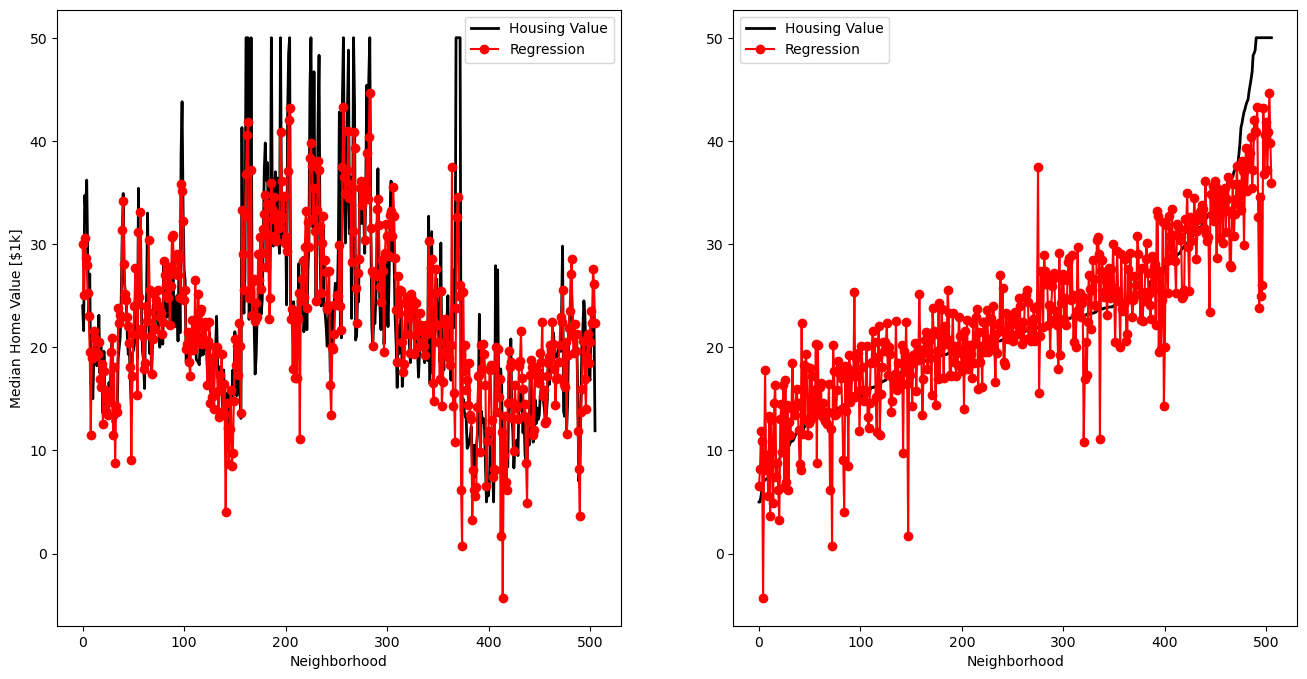

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b_s = b[sort_ind] # sorted values
plt.plot(b_s, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()


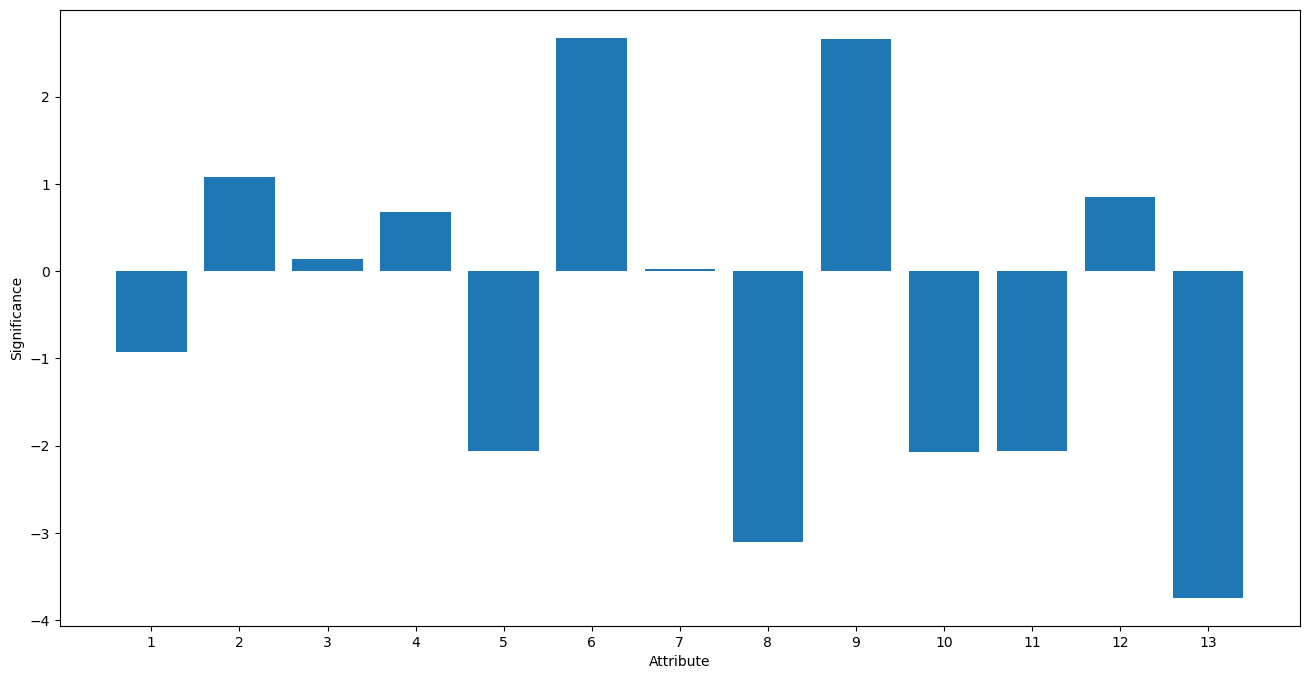

In [45]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()